# 高斯混合模型的变分贝叶斯方法



In [2]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 1 设定

考虑非监督学习问题 

* 令$N \in \mathbb{N}$ 表示样本点的个数
* 令$D \in \mathbb{N}$ 表示输入的维数.
* 假设输入数据为$x_0, x_1, \dots , x_{N-1} \in \mathbb{R}^D$. 
* 定义$X$, 其中 $X_{n,i}$ 表示 $x_n$的第 $i$个分量.

# 2 理论

## 2.1 模型

假设模型有$N$个观测值，一个 $K  \in \mathbb{N}$类的高斯混合模型表示为

$$
\begin{align}
    & p(\pi) = {\rm Dir}(\pi | \alpha_0)\\
    & p(Z | \pi) = \prod_{n=0}^{N-1} \prod_{k=0}^{K-1} \pi_{k}^{z_{n,k}} \\
    & p\left(X \middle| Z, \mu, \Lambda, \pi \right) = 
    \prod_{n=0}^{N-1} \prod_{k=0}^{K-1} \mathcal{N}\left(x_n \middle| \mu_k , \Lambda_{k}^{-1} \right)^{z_{n,k}} \\
    & p(\Lambda) =  \prod_{k=0}^{K-1} \mathcal{W}\left(\Lambda_k \middle| W_0, \nu_0 \right)\\
    & p(\mu|\Lambda) = \prod_{k=0}^{K-1} \mathcal{N}\left(\mu_k \middle| m_0, (\beta_0 \Lambda_k)^{-1} \right)
\end{align}
$$

其中
* $Z = (z_{n,k})_{ n \in \{ 0, 1, \dots, N-1 \} k \in \{ 0,1, \dots, K-1 \}  }, \ z_{n,k}\in \{0,1 \}, \sum_{k=0}^{K-1}z_{n,k}=1$表示隐变量
* $\pi_k \geq 0, \sum_{k=0}^{K-1} \pi_k = 1$, 我们将 $(\pi_k)_{k \in \left\{ 0,1,\dots, K-1 \right\}}$ 记为$\pi$, 
* $\mathcal{N}\left(x \middle| \mu_k , \Lambda_{k}^{-1} \right)$ 是多元高斯分布，其中均值 $\mu_k \in \mathbb{R}^D$ ,$\Lambda_kD \times D$ 表示精度矩阵，我们记 $(\mu_k)_{k \in \left\{ 0,1,\dots, K-1 \right\}}$ 为 $\mu$ ，同理将 $(\Lambda_k)_{k \in \left\{ 0,1,\dots, K-1 \right\}}$记为$\Lambda$, 
* ${\rm Dir}(\pi | \alpha_0)$ 表示 Dirichlet 分布 
* $\mathcal{W}\left(\Lambda_k \middle| W_0, \nu_0 \right)$ 表示分布.

由概率图模型，联合概率可以写作

$$
\begin{align}
    p\left(X, Z, \pi, \mu, \Lambda \right)
    = p\left(X \middle| Z, \mu, \Lambda, \pi \right) 
    p(Z | \pi)
    p(\pi)
    p(\mu|\Lambda)
    p(\Lambda)
\end{align}
$$


## 2.2 变分方法

我们需要计算 $p(Z, \pi,\mu,\Lambda| X)$ 通过一个变分近似 $q(Z, \pi, \mu, \Lambda)$. 注： $q$ 由观测数据 $X$决定.

从而

$$
\begin{align}
    q(Z, \pi, \mu, \Lambda) = q(Z) q(\pi) \prod_{k=0}^{K-1} q(\mu_k, \Lambda_k), 
\end{align}
$$

这里

$$
\begin{align}
    & q(Z) = \prod_{n=0}^{N-1} \prod_{k=0}^{K-1} r_{n,k}^{z_{n,k}} \\
    & q(\pi) = {\rm Dir}(\pi|\alpha) \\
    & q(\mu_k, \Lambda_k) = 
    \mathcal{N}\left(\mu_k \middle| m_k, (\beta_k \Lambda_k)^{-1}\right)
    \mathcal{W}\left( \Lambda_k \middle| W_k, \nu_k \right)
\end{align}
$$

计算方法为


$$
\begin{align}
    \mbox{For $q(Z)$} & \\
    & r_{n,k} := \frac{\rho_{n,k}}{\sum_{j=0}^{K-1} \rho_{n,j}} \\
    & \rho_{n,k} := \frac{\tilde{\pi}_k \tilde{\Lambda}_{k}^{1/2}}{(2\pi)^{D/2}}
        \exp\left[ - \frac{D}{2\beta_k} - \frac{\nu_k}{2} (x_n - m_k)^T W_k (x_n - m_k) \right] \\
    & \tilde{\pi}_k := \exp \left[ \psi(\alpha_k) - \psi(\hat{\alpha}) \right] \\ 
    & \tilde{\Lambda}_k := \exp\left[ \sum_{i=0}^{D-1} \psi\left( \frac{\nu_k-i}{2} \right)  + D\log 2 + \log(\det W_k) \right] \\
    & \psi(a) := \frac{d}{da} \log \Gamma(a) \ \ (\mbox{digamma function}) \\
    & \hat{\alpha} := \sum_{k=1}^{K} \alpha_k \\
    \mbox{For $q(\pi, \Lambda, \mu)$} & \\
    & \alpha_k := \alpha_0 + N_k \\
    & \beta_k := \beta_0 + N_k \\
    & \nu_k := \nu_0 + N_k \\
    & m_k := \frac{1}{\beta_k}(\beta_0 m_0 + N_k \bar{x}_k) \\
    & W_{k}^{-1} := W_{0}^{-1} + N_k S_k 
    {} + \frac{\beta_0 N_k}{\beta_0 + N_k}(\bar{x}_k - m_0)(\bar{x}_k - m_0)^T \\
    & N_k := \sum_{n=0}^{N-1} r_{n,k} \\
    & \bar{x}_k := \frac{1}{N_k} \sum_{n=0}^{N-1} r_{n,k} x_n \\
    & S_k := \frac{1}{N_k} \sum_{n=0}^{N-1} r_{n,k}(x_n - \bar{x}_k)(x_n - \bar{x}_k)^T
\end{align}
$$

具体算法

1. Initialize parameters $\alpha_k, \beta_k, \nu_k, m_k, W_k$.
2. Calculate $r_{n,k}$ from $\alpha_k, \beta_k, \nu_k, m_k, W_k$.
3. Calculate $\alpha_k, \beta_k, \nu_k, m_k, W_k$ from $r_{n,k}$.
4. Repeat 2 and 3 until the variatoinal lower bound converges.


## 2.3 变分边界

变分边界 $\mathcal{L}(q)$ 用来诊断算法是否收敛

$$
\begin{align}
    \mathcal{L}(q) = -\sum_{n=0}^{N-1}\sum_{k=0}^{K-1} r_{n, k} \log r_{n, k} + 
    \log \frac{C(\alpha_0)}{C(\alpha)} + 
    \frac{D}{2} \sum_{k=0}^{K-1} \log \frac{\beta_0}{\beta_k} + 
    \sum_{k=0}^{K-1} \log \frac{B(W_0, \nu_0)}{B(W_k, \nu_k)} - 
    \frac{DN}{2} \log(2\pi), 
\end{align}
$$
其中
$$
\begin{align}
    C(\alpha) := \frac{\Gamma\left( \sum_{k=0}^{K-1} \alpha_k \right)}{\prod_{k=0}^{K-1} \Gamma(\alpha_k)}
\end{align}
$$
表示分布 $\mathrm{Dir}(\pi | \alpha)$的归一化因子 
$$
\begin{align}
    B(W, \nu) := \left( \det W \right)^{-\nu/2} \left[ 2^{\nu D/2} \pi^{D(D-1)/4} \prod_{i=0}^{D-1} \Gamma\left( \frac{\nu - i}{2} \right)  \right]^{-1}
\end{align}
$$
表示分布  $\mathcal{W}(\Lambda | W, \nu)$的归一化因子 。

The derivation is lengthy but straightforward, and hence I shall omit it here. 

## 2.4 模型预测

对于新数据 $\hat{x}$ ，隐变量$\hat{z}$ 可以表示为: 

$$
\begin{align}
    p(\hat{z} | \hat{x}, X) &\propto p(\hat{x}, \hat{z} | X) \simeq \prod_{k=0}^{K-1} \left[ \frac{\alpha_k}{\sum_{j=0}^{K-1} \alpha_j} \mathrm{St}\left(\hat{x} \middle| m_k, L_k, \nu_k + 1 - D  \right)  \right]^{\hat{z}_k} \\
    p(\hat{x} | X) &\simeq \frac{1}{\sum_{k=0}^{K-1} \alpha_k} \sum_{k=0}^{K-1} \alpha_k \mathrm{St}(\hat{x} | m_k, L_k, \nu_k + 1 - D) \\
    L_k &:= \frac{(\nu_k + 1 - D) \beta_k}{ 1 + \beta_k} W_k, 
\end{align}
$$
$\mathrm{St}$ 表示 Student's t 分布


# 3 从公式到代码

我们定义 `BayesianGaussianMixtureModel` 类.

## 3.1 变量与方法


### 变量

* `K` : $K$, i.e., the number of components
* `D` : $D$, i.e., the input dimension
* `alpha0` : $\alpha_0$, a positive float
* `beta0` : $\beta_0$, a positive float.
* `nu0` : $\nu_0$, float satisfying `nu0` > $D - 1$
* `m0` : $m_0$, a ($D$,) array.
* `W0` : $W_0$, a ($D$, $D$) array, representing a symmetric positive definite matrix.
* `alpha` : ($K$,) array, where `alpha[k] = ` $\alpha_k$
* `beta` : ($K$,) array, where `beta[k] = ` $\beta_k$
* `nu` : ($K$,) array, where `nu[k] = ` $\nu_k$
* `m` : ($K$, $D$) array, where `m[k, i]` = $i$ th component of $m_k$
* `W` : ($K$, $D$, $D$) array, where `W[k, i, j]` = (i,j) component of $W_k$.
* `lower_bound` : float, representing the variational lower bound.

### 方法

* `_init_params` : initializes parameters `alpha`, `beta`, `nu`, `m`, `W`.
* `_e_like_step` : performs E-like-step, i.e., calculates and returns $r$ from `alpha`, `beta`, `nu`, `m`, `W`.
* `_m_like_step` : peroforms M-like-step, i.e., calculates `alpha`, `beta`, `nu`, `m`, `W` from $r$.
* `calc_lower_bound` : calculates and returns the variational lower bound $\mathcal{L}$ for current parameter set.
* `fit` : fits the model to the data, i.e., runs `_e_like_step` and `_m_like_step` alternately until the variational lower bound converges.
* `_predict_joint_proba` : for given data points $\hat{x}$, returns the joint probability $p(\hat{x}, \hat{z} | X)$.
* `predict_proba` : for a given data set, returns probability over classes of latent variables.
* `predict` : for a given data set, returns the predicted class, which is the argmax of the corresponding latent variables.
* `calc_prob_density` : for a given data set, returns the predictive density 

## 3.2 计算




### 3.2.1 初始化参数
我们初始化参数
* `alpha`, `beta`, `nu` : They are initialized as `alpha[k] = alpha0 +` $N/K$ etc. An implicit assumption here is that the cluster sizes (the number of data belonging to a cluster) are almost the same for different clusters.
* `mu` : `K` vectors randomly chosen from the input $X$. 
* `W` : Each $W_k$ is taken to be a diagonal matrix, whose $i$th diagonal element is the 1/(variance of the $i$th component of the input data $X$). It may fail when the variance inside clusters is much smaller than the distances between clusters.


### 3.2.2 E-like-step

In the E-like-step, we evaluate $r_{n,k}$ according to the following equations:
$$
\begin{align}
    r_{n,k} &:= \frac{\rho_{n,k}}{\sum_{j=0}^{K-1} \rho_{n,j}} \\
    \rho_{n,k} &:= \frac{\tilde{\pi}_k \tilde{\Lambda}_{k}^{1/2}}{(2\pi)^{D/2}}
        \exp\left[ - \frac{D}{2\beta_k} - \frac{\nu_k}{2} (x_n - m_k)^T W_k (x_n - m_k) \right] \\
    \tilde{\pi}_k &:= \exp \left[ \psi(\alpha_k) - \psi(\hat{\alpha}) \right] \\ 
    \tilde{\Lambda}_k &:= \exp\left[ \sum_{i=0}^{D-1} \psi\left( \frac{\nu_k-i}{2} \right)  + D\log 2 + \log(\det W_k) \right] \\
    \psi(a) &:= \frac{d}{da} \log \Gamma(a) \ \ (\mbox{digamma function}) \\
    \hat{\alpha} &:= \sum_{k=1}^{K} \alpha_k
\end{align}
$$

We set the following three temporal arrays.
* `tpi` : (K,) array, where tpi[k] = $\tilde{\pi}_k$
* `tlam` : (K,) array, where tlam[k] = $\tilde{\Lambda}_k$
* `rho` : (N,K) array, where rho[n,k] = $\rho_{n,k}$

In calculating `tlam`, we define another temporal array `arg_digamma`, where `arg_digamma[k,i]` = $\nu_k - i$

In calculating `rho`, we first calculate a ($N, K, D$) array `diff`, where `diff[n,k,i]` = $(x_n - m_k)_{i}$, and then calculate a $(N, K)$ array `exponent`, where `exponent[n, k]` = $D/\beta_k  + \nu_k (x_n-m_k)^T W_k (x_n-m_k)$. 

Using these quantities, `rho` can be evaluated. We shall omit the $2\pi$ factor, because it does not affect the final result $r_{n,k}$. 
Also, note that because rho contains exponential factor, it often happens numerically that $\sum_{j=0}^{K-1}\rho_{n,j} = 0$, which hinders the normalization to obtain $r_{n, k}$.
To prevent such trouble, we subtract a constant (for each $n$) as  `exponent[n, k]` - $\min_j$(`exponent[n, j]`).

### 3.2.3 M-like-step

In the M-like-step, we calculate parameters using the following equations:

$$
\begin{align}
    \alpha_k &:= \alpha_0 + N_k \\
    \beta_k &:= \beta_0 + N_k \\
    \nu_k &:= \nu_0 + N_k \\
    m_k &:= \frac{1}{\beta_k}(\beta_0 m_0 + N_k \bar{x}_k) \\
    W_{k}^{-1} &:= W_{0}^{-1} + N_k S_k + \frac{\beta_0 N_k}{\beta_0 + N_k}(\bar{x}_k - m_0)(\bar{x}_k - m_0)^T \\
    N_k &:= \sum_{n=0}^{N-1} r_{n,k} \\
    \bar{x}_k &:= \frac{1}{N_k} \sum_{n=0}^{N-1} r_{n,k} x_n \\
    S_k &:= \frac{1}{N_k} \sum_{n=0}^{N-1} r_{n,k}(x_n - \bar{x}_k)(x_n - \bar{x}_k)^T
\end{align}
$$

* `n_samples_in_component` : ($K$,) array, where`n_samples_in_component[k]` = $N_k$
* `barx` : ($K, D$) array, where `barx[k, i]` = $\bar{x}_{k, i}$
* `S` : ($K, D, D$) array, where `S[k,i,j]`  = $(S_k)_{i,j}$

For calculating these quantities and parameters, we use the following two temporal arrays.
* `diff` : ($N,K,D$) array, where `diff[n,k,i]` = $x_{n,i} - \bar{x}_{k,i}$
* `diff2` : ($K, D$) array, where `diff2[k, i]` = $\bar{x}_{k,i} - (m_0)_i$

### 3.2.4 变分边界

$$
\begin{align}
    \mathcal{L}(q) = -\sum_{n=0}^{N-1}\sum_{k=0}^{K-1} r_{n, k} \log r_{n, k} + 
    \log \frac{C(\alpha_0)}{C(\alpha)} + 
    \frac{D}{2} \sum_{k=0}^{K-1} \log \frac{\beta_0}{\beta_k} + 
    \sum_{k=0}^{K-1} \log \frac{B(W_0, \nu_0)}{B(W_k, \nu_k)} - 
    \frac{DN}{2} \log(2\pi), 
\end{align}
$$
其中
$$
\begin{align}
    C(\alpha) &:= \frac{\Gamma\left( \sum_{k=0}^{K-1} \alpha_k \right)}{\prod_{k=0}^{K-1} \Gamma(\alpha_k)} \\
    B(W_k, \nu_k) &:= \left( \det W_k \right)^{-\nu_k/2} \left[ 2^{\nu_k D/2} \pi^{D(D-1)/4} \prod_{i=0}^{D-1} \Gamma\left( \frac{\nu_k - i}{2} \right)  \right]^{-1}
\end{align}
$$


In [13]:
from scipy.special import gamma, digamma, gammaln

def logC(alpha):
    '''
    Function for calculating the natural log of C(alpha), the normalization constant for Dirichlet distributions.
    See equations (B.16) and (B.27) of PRML.
    
    Parameters
    ----------
    alpha : 1D numpy array
        1D numpy array representing the parameter alpha for Dirichlet distribution. 
            
    Returns
    ----------
    logC : flaot
        log of C(alpha), the normalization constant for Dirichlet distributions
    '''
    return gammaln(alpha.sum()) - gammaln(alpha).sum()
    
def logB(W, nu):
    '''
    Function for calculating the natural log of B(W, nu), the normalization constant for Wishart distributions.
    See equations (B.78) and (B.79) of PRML.
    
    Parameters
    ----------
    W : 2D or 3D numpy array
        numpy array representing the parameter W for Wishart distributions.
        When W is a 2D array, it must be a (D, D) symmetric positive definite matrix, where D is a integer.
        When W is a 3D array, it must be a (K, D, D) array, and W[k] are symmetric positive definite matrices, where K and D are integers. 
        In the latter case, it is understood that the function deals with several Wishart distributions at once.
    nu : float, or 1D numpy array
        Number(s) representing the degrees of freedom of Wishart distributions.
        When W is (K, D, D) (resp. 2D) numpy array, it must be (K,) numpy array (resp. float).
            
    Returns
    ----------
    logB : flaot or 1D numpy array
        log of B(alpha), the normalization constant for Wishart distributions.
    '''
    Wshape = W.shape
    if len(Wshape) == 2:
        D, _ = Wshape
        arg_gamma = nu - np.arange(0, D, 1)
        return -nu/2 * np.log(np.linalg.det(W)) - D/2 * nu * np.log(2) - D* (D - 1)/4 * np.log(np.pi) - gammaln(arg_gamma/2).sum()
    else:
        K, D, _ = Wshape
        arg_gamma = np.reshape(nu, (K, 1)) - np.reshape(np.arange(0, D, 1), (1, D))
        return -nu/2 * np.log(np.linalg.det(W)) - D/2 * nu * np.log(2) - D* (D - 1)/4 * np.log(np.pi) - gammaln(arg_gamma/2).sum(axis=1)

### 3.2.5 预测

$$
\begin{align}
    p(\hat{z} | \hat{x}, X) &\propto p(\hat{x}, \hat{z} | X) \simeq \prod_{k=0}^{K-1} \left[ \frac{\alpha_k}{\sum_{j=0}^{K-1} \alpha_j} \mathrm{St}\left(\hat{x} \middle| m_k, L_k, \nu_k + 1 - D  \right)  \right]^{\hat{z}_k} \\
    p(\hat{x} | X) &\simeq \frac{1}{\sum_{k=0}^{K-1} \alpha_k} \sum_{k=0}^{K-1} \alpha_k \mathrm{St}(\hat{x} | m_k, L_k, \nu_k + 1 - D) \\
    L_k &:= \frac{(\nu_k + 1 - D) \beta_k}{ 1 + \beta_k} W_k
\end{align}
$$

 Student's t 分布定义为
$$
\begin{align}
    \mathrm{St}\left(x \middle| \mu, L, \nu \right) &= \frac{\Gamma\left(\frac{\nu + D}{2} \right)}{\Gamma\left(\frac{\nu}{2}\right)}
        \frac{(\det L)^{1/2}}{(\nu \pi)^{D/2}}
        \left( 1 + \frac{\Delta^2}{\nu} \right)^{-\frac{\nu}{2} - \frac{D}{2}} \\
    \Delta^2 &:= (x - \mu)^T L (x- \mu)
\end{align}
$$



In [4]:
def multi_student_t(X, mu, L, nu):
    '''
    Function for calculating the probability density of multivariate Student's t distribution.
    See equations (B.68) and (B.72) of PRML.
    
    Parameters
    ----------
    X : 2D numpy array
        2D numpy array representing input data points on which the density are calculated.
        X[n, i] represents the i-th element of n-th point in X.
    mu : 1D numpy array
        1D numpy array representing the mean of the distribution. 
        Its length must coincide with X.shape[1]
    L : 2D numpy array
        2D numpy array representing "accuracy".
        It must be a (D, D) array, where D = X.shape[1]
    nu : float, must be positive
        a positive number representing the degrees of freedom of the distribution
            
    Returns
    ----------
    prob_density : 1D numpy array
        The probability density of the Student's t distribution with the given parameters mu, L, nu, evaluated on X, 
        where prob_density[n] = the density on n-th data of X.
    '''
    _, D = X.shape
    diff = X - mu
    delta2 = ((diff @ L ) * diff).sum(axis=1)
    coeff = gamma( (nu + D)/2 )/gamma(nu/2) * (np.linalg.det(L)**0.5) / ((nu*np.pi)**(D/2))
    return coeff/((1 + delta2/nu)**(0.5*nu + 0.5*D))    

## 3.3 `BayesianGaussianMixtureModel` 类

In [14]:
class BayesianGaussianMixtureModel:
    
    def __init__(self, K, D, alpha0, beta0, nu0, m0, W0):
        self.K = K
        self.D = D
        self.alpha0 = alpha0
        self.beta0 = beta0
        self.nu0 = nu0
        self.m0 = m0
        self.W0 = W0
        
        self.alpha = None
        self.beta = None
        self.nu = None
        self.m = None
        self.W = None
        self.lower_bound = None
            
    def _init_params(self, X, random_state=None):
        '''
        Method for initializing model parameterse based on the size and variance of the input data array. 
        
        Parameters
        ----------
        X : 2D numpy array
            2D numpy array representing input data, where X[n, i] represents the i-th element of n-th point in X.
        random_state : int
            int, specifying the seed for random initialization of m
        '''
        N, D = X.shape
        rnd = np.random.RandomState(seed=random_state)
        
        self.alpha = (self.alpha0 + N / self.K) * np.ones(self.K)
        self.beta = (self.beta0 + N / self.K) * np.ones(self.K)
        self.nu = (self.nu0 + N / self.K) * np.ones(self.K)
        self.m = X[rnd.randint(low=0, high=N, size=self.K)]
        self.W = np.tile(np.diag(1.0/np.var(X, axis=0)), (self.K, 1, 1))

    def _e_like_step(self, X):
        '''
        Method for calculating the array corresponding to responsibility.
        
        Parameters
        ----------
        X : 2D numpy array
            2D numpy array representing input data, where X[n, i] represents the i-th element of n-th point in X.
            
        Returns
        ----------
        r : 2D numpy array
            2D numpy array representing responsibility of each component for each sample in X, 
            where r[n, k] = $r_{n, k}$.
        
        '''
        N, _ = np.shape(X)
        
        tpi = np.exp( digamma(self.alpha) - digamma(self.alpha.sum()) )
        
        arg_digamma = np.reshape(self.nu, (self.K, 1)) - np.reshape(np.arange(0, self.D, 1), (1, self.D))
        tlam = np.exp( digamma(arg_digamma/2).sum(axis=1)  + self.D * np.log(2) + np.log(np.linalg.det(self.W)) )
        
        diff = np.reshape(X, (N, 1, self.D) ) - np.reshape(self.m, (1, self.K, self.D) )
        exponent = self.D / self.beta + self.nu * np.einsum("nkj,nkj->nk", np.einsum("nki,kij->nkj", diff, self.W), diff)
        
        exponent_subtracted = exponent - np.reshape(exponent.min(axis=1), (N, 1))
        rho = tpi*np.sqrt(tlam)*np.exp( -0.5 * exponent_subtracted )
        r = rho/np.reshape(rho.sum(axis=1), (N, 1))
        
        return r
    
    
    def _m_like_step(self, X, r):
        '''
        Method for calculating the model parameters based on the responsibility.
        
        Parameters
        ----------
        X : 2D numpy array
            2D numpy array representing input data, where X[n, i] represents the i-th element of n-th point in X.
        r : 2D numpy array
            2-D numpy array representing responsibility of each component for each sample in X, 
            where r[n, k] = $r_{n, k}$.
        '''
        N, _ = np.shape(X)
        n_samples_in_component = r.sum(axis=0)
        barx = r.T @ X / np.reshape(n_samples_in_component, (self.K, 1))
        diff = np.reshape(X, (N, 1, self.D) ) - np.reshape(barx, (1, self.K, self.D) )
        S = np.einsum("nki,nkj->kij", np.einsum("nk,nki->nki", r, diff), diff) / np.reshape(n_samples_in_component, (self.K, 1, 1))
        
        self.alpha = self.alpha0 + n_samples_in_component
        self.beta = self.beta0 + n_samples_in_component
        self.nu = self.nu0 + n_samples_in_component
        self.m = (self.m0 * self.beta0 + barx * np.reshape(n_samples_in_component, (self.K, 1)))/np.reshape(self.beta, (self.K, 1))
        
        diff2 = barx - self.m0
        Winv = np.reshape(np.linalg.inv( self.W0 ), (1, self.D, self.D)) + \
            S * np.reshape(n_samples_in_component, (self.K, 1, 1)) + \
            np.reshape( self.beta0 * n_samples_in_component / (self.beta0 + n_samples_in_component), (self.K, 1, 1)) * np.einsum("ki,kj->kij",diff2,diff2) 
        self.W = np.linalg.inv(Winv)
        
    def _calc_lower_bound(self, r):
        '''
        Method for calculating the variational lower bound.
        
        Parameters
        ----------
        r : 2D numpy array
            2-D numpy array representing responsibility of each component for each sample in X, 
            where r[n, k] = $r_{n, k}$.
        Returns
        ----------
        lower_bound : float
            The variational lower bound, where the final constant term is omitted.
        '''
        return - (r * np.log(r)).sum() + \
            logC(self.alpha0*np.ones(self.K)) - logC(self.alpha) +\
            self.D/2 * (self.K * np.log(self.beta0) - np.log(self.beta).sum()) + \
            self.K * logB(self.W0, self.nu0) - logB(self.W, self.nu).sum()
            
        
    def fit(self, X, max_iter=1e3, tol=1e-4, random_state=None, disp_message=False):
        '''
        Method for fitting the model.
        
        Parameters
        ----------
        X : 2D numpy array
            2D numpy array representing input data, where X[n, i] represents the i-th element of n-th point in X.
        max_iter : int
            The maximum number of iteration
        tol : float
            The criterion for juding the convergence. 
            When the change of lower bound becomes smaller than tol, the iteration is stopped.
        random_state : int
            An integer specifying the random number seed for random initialization
        disp_message : Boolean
            Whether to show the message on the result.
        '''
        self._init_params(X, random_state=random_state)
        r = self._e_like_step(X)
        lower_bound = self._calc_lower_bound(r)
        
        for i in range(max_iter):
            self._m_like_step(X, r)
            r = self._e_like_step(X)
            
            lower_bound_prev = lower_bound
            lower_bound = self._calc_lower_bound(r)
            
            if abs(lower_bound - lower_bound_prev) < tol:
                break
        
        self.lower_bound = lower_bound
        
        if disp_message:
            print(f"n_iter : {i}")
            print(f"convergend : {i < max_iter}")
            print(f"lower bound : {lower_bound}")
            print(f"Change in the variational lower bound : {lower_bound - lower_bound_prev}")
            
    
    def _predict_joint_proba(self, X):
        '''
        Method for calculating and returning the joint probability. 
        
        Parameters
        ----------
        X : 2D numpy array
            2D numpy array representing input data, where X[n, i] represents the i-th element of n-th point in X.
        
        Returns
        ----------
        joint_proba : 2D numpy array
            A numpy array with shape (len(X), self.K), where joint_proba[n, k] = joint probability p(X[n], z_k=1 | training data)
        '''
        L = np.reshape( (self.nu + 1 - self.D)*self.beta/(1 + self.beta), (self.K, 1,1) ) * self.W
        tmp = np.zeros((len(X), self.K))
        for k in range(self.K):
            tmp[:,k] = multi_student_t(X, self.m[k], L[k], self.nu[k] + 1 - self.D)
        return tmp * np.reshape(self.alpha/(self.alpha.sum()), (1, self.K))
    
    def calc_prob_density(self, X):
        '''
        Method for calculating and returning the predictive density.
        
        Parameters
        ----------
        X : 2D numpy array
            2D numpy array representing input data, where X[n, i] represents the i-th element of n-th point in X.
        
        Returns
        ----------
        prob_density : 1D numpy array
            A numpy array with shape (len(X), ), where proba[n] =  p(X[n] | training data)
        '''
        joint_proba = self._predict_joint_proba(X)
        return joint_proba.sum(axis=1)
    
    def predict_proba(self, X):
        '''
        Method for calculating and returning the probability of belonging to each component.
        
        Parameters
        ----------
        X : 2D numpy array
            2D numpy array representing input data, where X[n, i] represents the i-th element of n-th point in X.
        
        Returns
        ----------
        proba : 2D numpy array
            A numpy array with shape (len(X), self.K), where proba[n, k] =  p(z_k=1 | X[n], training data)
        '''
        joint_proba = self._predict_joint_proba(X)
        return joint_proba / joint_proba.sum(axis=1).reshape(-1, 1)
    
    def predict(self, X):
        '''
        Method for predicting which component each input data belongs to.
        
        Parameters
        ----------
        X : 2D numpy array
            2D numpy array representing input data, where X[n, i] represents the i-th element of n-th point in X.
        
        Returns
        ----------
        pred : 1D numpy array
            A numpy array with shape (len(X), ), where pred[n] =  argmax_{k} p(z_k=1 | X[n], training data)
        '''
        proba = self.predict_proba(X)
        return proba.argmax(axis=1)

        

# 4 实验

## 4.1 数据准备

In [15]:
def get_meshgrid(x, y, nx, ny, margin=0.1):
    x_min, x_max = (1 + margin) * x.min() - margin * x.max(), (1 + margin) * x.max() - margin * x.min()
    y_min, y_max = (1 + margin) * y.min() - margin * y.max(), (1 + margin) * y.max() - margin * y.min()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    return xx, yy

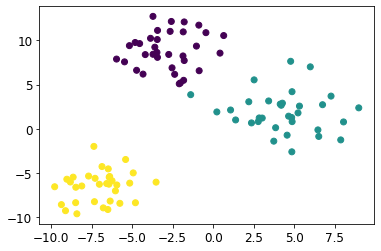

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, n_features=2, n_samples=100, cluster_std=[2.0, 2.3, 1.8], random_state=42)
plt.scatter(X[:,0], X[:,1], c=y)

xx, yy = get_meshgrid(X[:, 0], X[:, 1], nx=100, ny=100, margin=0.1)

In [17]:
def plot_predicted_label(ax, clf, xx, yy, X, t):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.7)
    ax.scatter(X[:,0], X[:,1], c=t, edgecolor='k')
    
def plot_prob_density(ax, model, xx, yy, X, t):
    Z = model.calc_prob_density(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.scatter(X[:,0], X[:,1], c=t, edgecolor='k')
    ax.contour(xx, yy, Z)
    
def plot_result(model, xx, yy, X, t):
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(121)
    plot_predicted_label(ax, model, xx, yy, X, t)
    ax = fig.add_subplot(122)
    plot_prob_density(ax, model, xx, yy, X, t)

## 4.2 例子


n_iter : 10
convergend : True
lower bound : -389.1578289309176
Change in the variational lower bound : -3.9195783756440505e-05


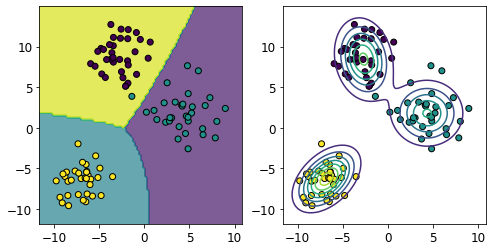

In [18]:
bgmm = BayesianGaussianMixtureModel(K=3, D=2, alpha0=1.0, beta0=1.0, nu0=2.0, m0=np.zeros(2), W0=np.eye(2))
bgmm.fit(X, max_iter=1000, tol=1e-4, random_state=42, disp_message=True)
plot_result(bgmm, xx, yy, X, y)
plt.show()

在学习机器学习的过程中，常常遇到random_state这个参数，下面来简单叙述一下它的作用。
作用：控制随机状态。

n_iter : 8
convergend : True
lower bound : -397.75619724106684
Change in the variational lower bound : 1.2367827594061964e-05


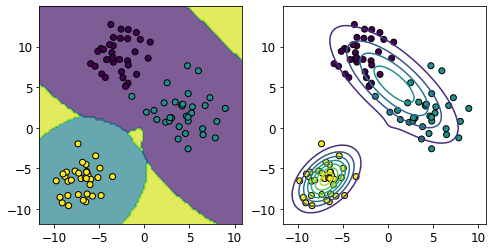

In [19]:
bgmm = BayesianGaussianMixtureModel(K=3, D=2, alpha0=1.0, beta0=1.0, nu0=2.0, m0=np.zeros(2), W0=np.eye(2))
bgmm.fit(X, max_iter=1000, tol=1e-4, random_state=0, disp_message=True)
plot_result(bgmm, xx, yy, X, y)
plt.show()

## 4.2 超参数选区

依据变分下界选取超参数

In [11]:
best_estimator = None
best_lower_bound = -np.float("inf")
m0 = np.zeros(2)

for alpha0 in [0.1, 1.0, 10.0, 100.0]:
    for beta0 in [0.01, 0.1, 1.0]:
        for nu0 in [1.1, 2.0, 11.0]:
            for W0 in [0.01*np.eye(2), 0.1*np.eye(2), np.eye(2), 10.0*np.eye(2)]:
                for random_state in np.arange(0,10,1):
                    bgmm = BayesianGaussianMixtureModel(K=3, D=2, alpha0=alpha0, beta0=beta0, nu0=nu0, m0=m0, W0=W0)
                    bgmm.fit(X, max_iter=1000, tol=1e-4, random_state=random_state, disp_message=False)
                    if bgmm.lower_bound > best_lower_bound:
                        best_estimator = bgmm
                        best_lower_bound = bgmm.lower_bound

D:\python\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log
D:\python\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in multiply


lower_bound : -367.9533872980828


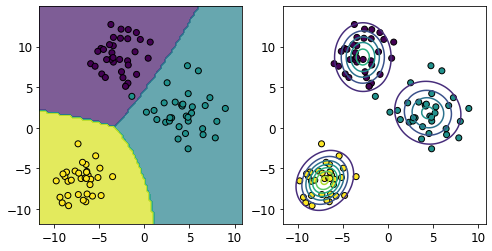

In [21]:
plot_result(best_estimator, xx, yy, X, y)
print(f"lower_bound : {best_lower_bound}")

In [20]:
print(f"alpha0 : {best_estimator.alpha0}")
print(f"beta0 : {best_estimator.beta0}")
print(f"nu0 : {best_estimator.nu0}")
print(f"m0 : {best_estimator.m0}")
print(f"W0 : {best_estimator.W0}")

alpha0 : 100.0
beta0 : 0.1
nu0 : 2.0
m0 : [0. 0.]
W0 : [[0.1 0. ]
 [0.  0.1]]


## 4.3 超参数$K$取得很大

我们取 $K=10$. 


lower bound : -452.0379619828742


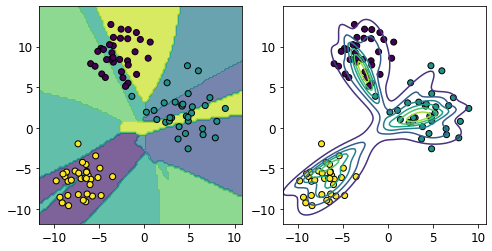

In [22]:
alpha0 = 10.0

best_estimator = None
best_lower_bound = -np.float("inf")

for random_state in np.arange(0,10,1):
    bgmm = BayesianGaussianMixtureModel(K=10, D=2, alpha0=alpha0, beta0=1.0, nu0=2.0, m0=np.zeros(2), W0=np.eye(2))
    bgmm.fit(X, max_iter=1000, tol=1e-4, random_state=random_state, disp_message=False)
    if bgmm.lower_bound > best_lower_bound:
        best_estimator = bgmm
        best_lower_bound = bgmm.lower_bound
        
plot_result(best_estimator, xx, yy, X, y)
print(f"lower bound : {best_lower_bound}")

超参数 $\alpha_0$的选择

lower bound : -396.83871150380935


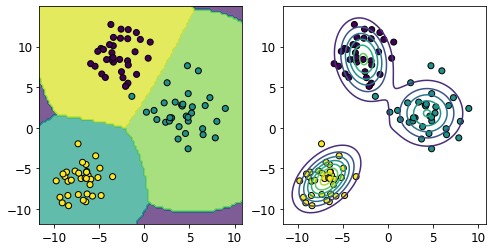

In [23]:
alpha0 = 0.1

best_estimator = None
best_lower_bound = -np.float("inf")

for random_state in np.arange(0,10,1):
    bgmm = BayesianGaussianMixtureModel(K=10, D=2, alpha0=alpha0, beta0=1.0, nu0=2.0, m0=np.zeros(2), W0=np.eye(2))
    bgmm.fit(X, max_iter=1000, tol=1e-4, random_state=random_state, disp_message=False)
    if bgmm.lower_bound > best_lower_bound:
        best_estimator = bgmm
        best_lower_bound = bgmm.lower_bound
        
plot_result(best_estimator, xx, yy, X, y)
print(f"lower bound : {best_lower_bound}")